In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
ticker = yf.Ticker("SMBK")

In [4]:
ticker.recommendations['To Grade']

Date
2016-08-29 07:28:52        Outperform
2018-04-10 20:04:08    Market Perform
2018-04-26 13:54:44        Outperform
2018-06-26 12:08:48      Equal-Weight
2018-10-25 15:20:32        Outperform
2019-03-04 14:20:33               Buy
2019-07-11 11:39:55           Neutral
2019-07-29 10:52:48    Market Perform
2019-11-04 14:17:50               Buy
2020-07-23 10:31:32        Outperform
2021-01-21 12:19:33        Outperform
2021-04-22 17:31:42        Strong Buy
2021-07-22 12:07:08        Overweight
2022-01-26 12:32:42        Strong Buy
2022-07-07 11:56:20        Outperform
Name: To Grade, dtype: object

In [5]:
df = pd.DataFrame(ticker.history(period="1y"))
df.index
y = df['Close'].values.reshape(-1, 1)
X = df.index.values.reshape(-1, 1)

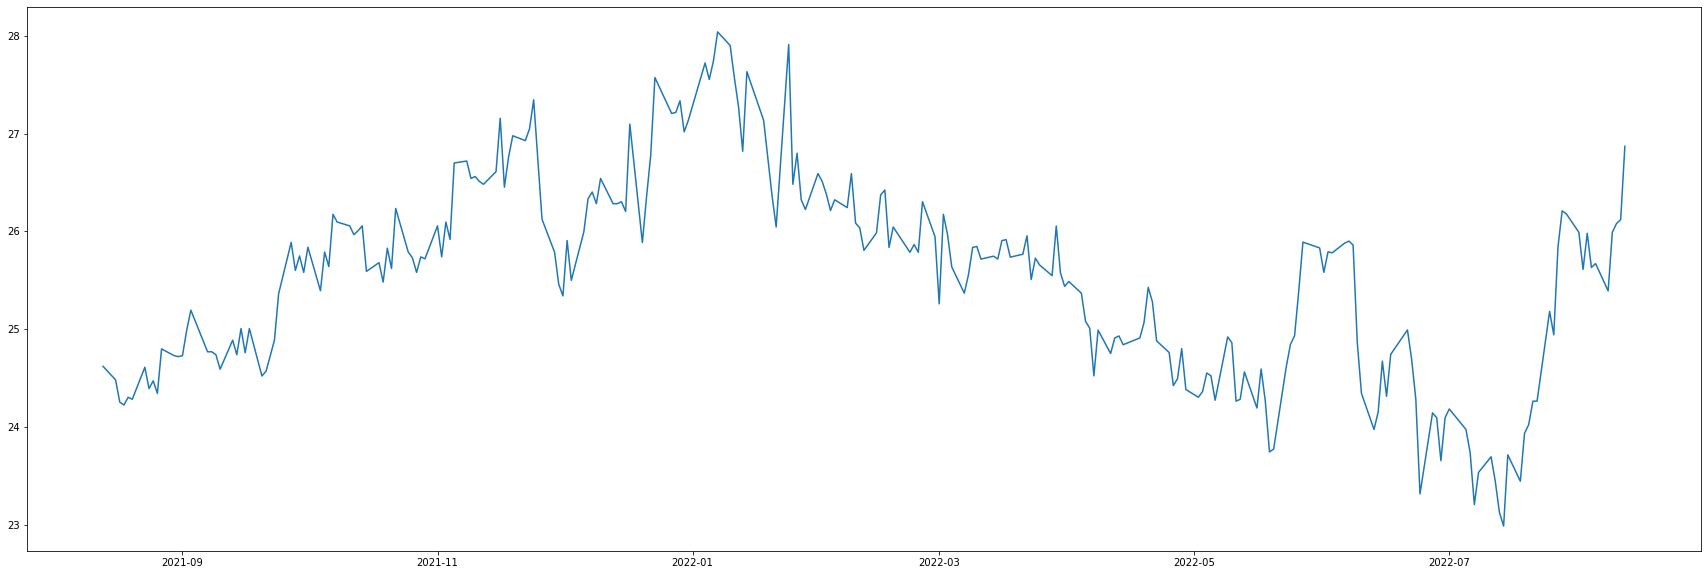

In [6]:
plt.figure(figsize=(30, 10))
plt.plot(X,y)
plt.show()

In [7]:
t= 0
x = []
print(X)
for i in X:
    x.append([t])
    t+=1
print(x)   

[['2021-08-13T00:00:00.000000000']
 ['2021-08-16T00:00:00.000000000']
 ['2021-08-17T00:00:00.000000000']
 ['2021-08-18T00:00:00.000000000']
 ['2021-08-19T00:00:00.000000000']
 ['2021-08-20T00:00:00.000000000']
 ['2021-08-23T00:00:00.000000000']
 ['2021-08-24T00:00:00.000000000']
 ['2021-08-25T00:00:00.000000000']
 ['2021-08-26T00:00:00.000000000']
 ['2021-08-27T00:00:00.000000000']
 ['2021-08-30T00:00:00.000000000']
 ['2021-08-31T00:00:00.000000000']
 ['2021-09-01T00:00:00.000000000']
 ['2021-09-02T00:00:00.000000000']
 ['2021-09-03T00:00:00.000000000']
 ['2021-09-07T00:00:00.000000000']
 ['2021-09-08T00:00:00.000000000']
 ['2021-09-09T00:00:00.000000000']
 ['2021-09-10T00:00:00.000000000']
 ['2021-09-13T00:00:00.000000000']
 ['2021-09-14T00:00:00.000000000']
 ['2021-09-15T00:00:00.000000000']
 ['2021-09-16T00:00:00.000000000']
 ['2021-09-17T00:00:00.000000000']
 ['2021-09-20T00:00:00.000000000']
 ['2021-09-21T00:00:00.000000000']
 ['2021-09-22T00:00:00.000000000']
 ['2021-09-23T00:00:

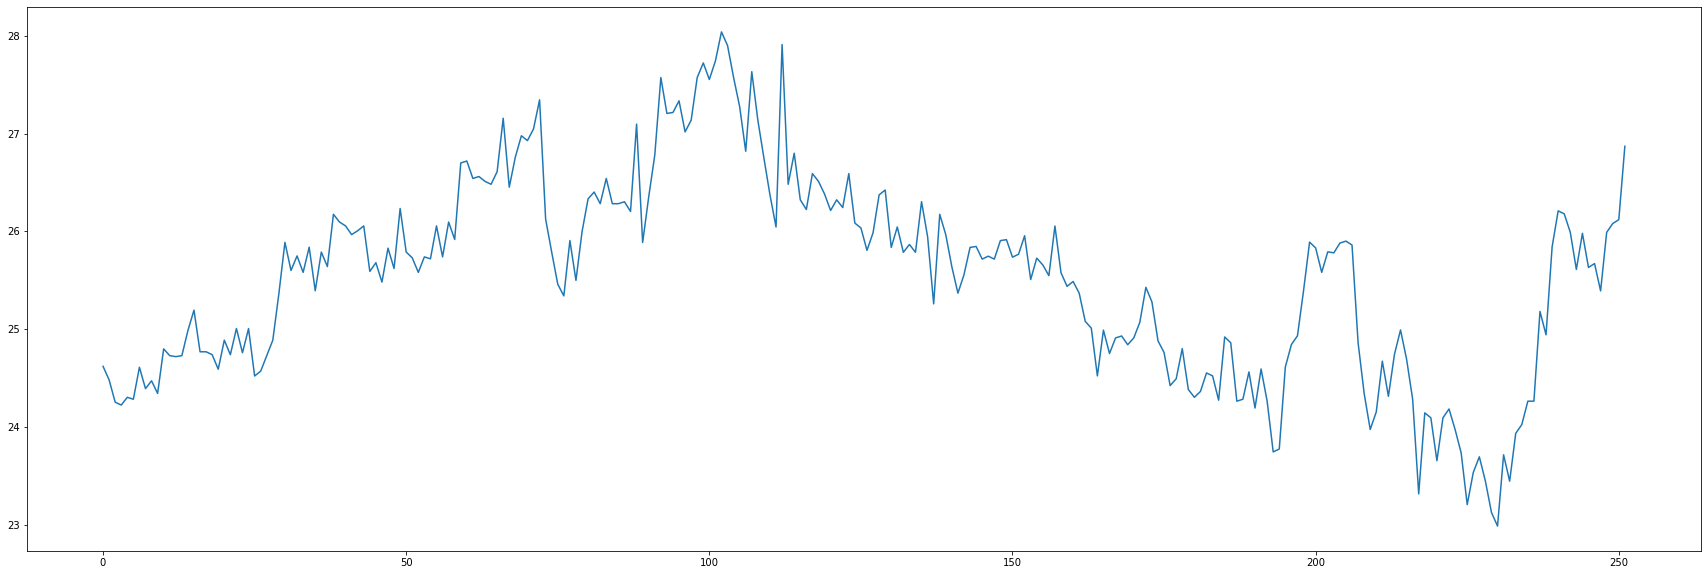

In [8]:
plt.figure(figsize=(30, 10))
plt.plot(x,y)
plt.show()

In [9]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

[26.13190918]


In [13]:
print(regressor.coef_)

[[-0.00468853]]


In [14]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 100)
print(score) 

[[25.66305657]]


In [15]:
score = regressor.predict([[100]])
print(score) 

[[25.66305657]]


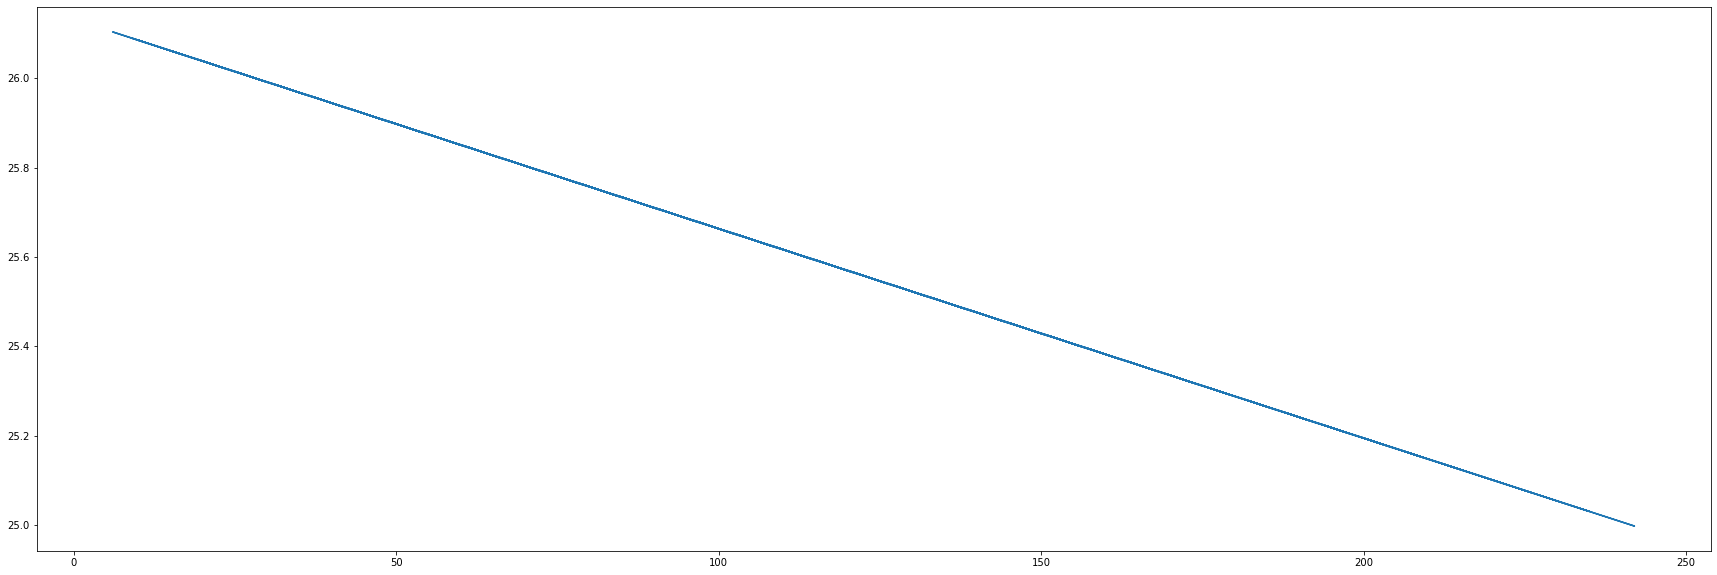

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0   24.990829  25.358302
1   24.611261  26.103778
2   26.045067  25.611483
3   25.428392  25.325483
4   26.322775  25.592729
5   24.523432  25.273909
6   25.890509  25.198892
7   24.264872  25.030106
8   24.344069  26.089712
9   25.887840  25.991253
10  26.719101  25.850598
11  24.145193  25.109810
12  23.536827  25.072302
13  25.438337  25.386434
14  26.759172  25.813089
15  25.905733  25.438007
16  24.843319  25.212958
17  25.195120  26.061581
18  27.741070  25.658368
19  25.007099  26.019385
20  26.302938  25.728696
21  24.591471  26.042827
22  26.590565  25.583352
23  26.084738  25.550532
24  25.581064  25.977188
25  25.990240  24.997286
26  24.861549  25.259843
27  24.095327  25.105122
28  24.799284  26.085024
29  25.080330  25.372368
30  25.637230  25.475516
31  27.017044  25.681811
32  26.035015  25.545843
33  26.283102  25.747450
34  24.743587  25.133253
35  24.522196  26.014696
36  26.749252  25.620860
37  24.739908  26.047516
38  25.900482  25.170761


In [18]:
regressor.predict([[300]])

array([[24.72535134]])